In [167]:
#!c1.8
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [170]:
#!c1.8
import torchvision
from torchvision import transforms, models

train_dir = 'images_splited/train'
val_dir = 'images_splited/val'
test_dir = 'images_splited/test'

image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

target_transforms = transforms.Lambda(lambda x: x-1)

train_dataset = torchvision.datasets.ImageFolder(train_dir, image_transforms, target_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, image_transforms, target_transforms)
test_dataset = torchvision.datasets.ImageFolder(test_dir, image_transforms, target_transforms)

In [171]:
#!c1.8
import torch
batch_size = 8
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=batch_size)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, num_workers=batch_size)
test_dataloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=True, num_workers=batch_size)

In [172]:
#!c1.8
import matplotlib.pyplot as plt
def show_input(input_tensor, title=''):
    image = input_tensor.permute(1, 2, 0).numpy()
    plt.imshow(image.clip(0, 1))
    plt.title(title)
    plt.show()
    plt.pause(0.001)

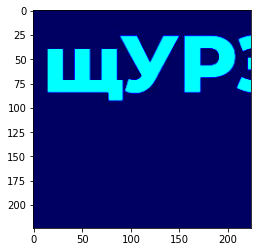

In [175]:
#!c1.8
X_batch, y_batch = next(iter(train_dataloader))
show_input(X_batch[0])

In [176]:
#!c1.8
from tqdm import tqdm

def train_model(model, loss, optimizer, scheduler, num_epochs):
    for epoch in range(num_epochs):
        print('Epoch {}/{}:'.format(epoch, num_epochs - 1), flush=True)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                dataloader = train_dataloader
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                dataloader = val_dataloader
                model.eval()   # Set model to evaluate mode

            running_loss = 0.
            running_acc = 0.

            # Iterate over data.
            for inputs, labels in tqdm(dataloader):
                #inputs = inputs.to(device)
                #labels = labels.to(device)
                print(labels)

                optimizer.zero_grad()

                # forward and backward
                with torch.set_grad_enabled(phase == 'train'):
                    preds = model(inputs)
                    loss_value = loss(preds, labels)
                    preds_class = preds.argmax(dim=1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss_value.backward()
                        optimizer.step()

                # statistics
                running_loss += loss_value.item()
                running_acc += (preds_class == labels.data).float().mean()

            epoch_loss = running_loss / len(dataloader)
            epoch_acc = running_acc / len(dataloader)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc), flush=True)

    return model

In [177]:
#!c1.8
model = models.resnet18(pretrained=True)

# Disable grad for all conv layers
for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Linear(model.fc.in_features, 10)

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#model = model.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)

# Decay LR by a factor of 0.1 every 7 epochs
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /tmp/xdg_cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [178]:
#!c1.8
train_model(model, loss, optimizer, scheduler, num_epochs=10)

, 5, 5, 3, 2])
tensor([3, 2, 6, 6, 2, 6, 6, 9])
tensor([9, 2, 1, 9, 2, 2, 3, 7])
tensor([1, 9, 6, 1, 5, 1, 5, 2])
tensor([7, 9, 5, 2, 4, 6, 6, 9])
tensor([0, 3, 1, 2, 6, 5, 7, 3])
tensor([9, 0, 9, 7, 1, 5, 0, 1])
tensor([0, 3, 4, 0, 0, 9, 4, 1])
tensor([9, 0, 6, 2, 5, 5, 2, 2])
tensor([9, 1, 5, 3, 7, 4, 6, 6])
tensor([3, 3, 1, 9, 3, 3, 4, 1])
tensor([7, 0, 3, 9, 4, 2, 5, 1])
tensor([9, 4, 4, 4, 9, 7, 3, 5])
tensor([6, 7, 4, 1, 2, 2, 5, 4])
tensor([0, 2, 3, 1, 9, 2, 7, 2])
tensor([9, 9, 2, 6, 2, 5, 9, 1])
tensor([3, 0, 6, 2, 9, 9, 9, 2])
tensor([6, 3, 0, 4, 1, 4, 1, 6])
tensor([2, 4, 2, 5, 7, 0, 1, 1])
tensor([3, 3, 9, 1, 3, 0, 0, 2])
tensor([6, 9, 1, 7, 4, 7, 9, 1])
tensor([5, 9, 9, 6, 9, 3, 5, 0])
tensor([6, 4, 4, 2, 4, 7, 9, 2])
tensor([3, 7, 1, 1, 7, 6, 2, 9])
tensor([6, 3, 2, 6, 4, 6, 1, 1])
tensor([3, 2, 5, 5, 4, 6, 4, 0])
tensor([9, 0, 9, 3, 2, 0, 5, 0])
tensor([6, 5, 3, 4, 4, 2, 0, 2])
tensor([9, 7, 9, 3, 2, 0, 6, 9])
tensor([2, 6, 4, 7, 5, 0, 0, 2])
tensor([1, 9, 0, 1, 7, 1, 2,

100%|██████████| 449/449 [00:56<00:00,  7.89it/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [179]:
#!c1.8
torch.save(model.state_dict(), "models/res_net")

In [183]:
#!c1.8
import numpy as np
model.eval()

test_predictions = []
test_img_paths = []
for inputs, labels in tqdm(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    with torch.set_grad_enabled(False):
        preds = model(inputs)
    test_predictions.append(
        torch.nn.functional.softmax(preds, dim=1)[:,1].data.cpu().numpy())
    
test_predictions = np.concatenate(test_predictions)

100%|██████████| 337/337 [00:55<00:00,  6.05it/s]


In [184]:
#!c1.8
test_predictions

array([0.03782674, 0.08112085, 0.05394278, ..., 0.10945092, 0.10473899,
       0.05738035], dtype=float32)